---
# **RECURRENT NEURAL NETWORK**
Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other. 

A Recurrent Neural Network (RNN) is a class of artificial neural networks, the main goal of which to process sequential data. Compared with feedforward neural networks, RNNs have connections that cut through loops and can maintain a memory of previous inputs. This means RNNs are particularly suitable for the kind of natural language problems and other sequence past data where order/sequence does matter.


## **Why use RNN?**

#### **Handling Sequential Data**
- Real-world tasks, however, involve data that is often in the form of a sequence — where using such ordering information among datapoints matters. 
- In time series prediction, for instance, the future value relies on past values; in natural language processing (NLP), the relevance of a word can be defined by words that have come before. 
- This is the niche of RNNs which are great when it comes to sequential data meaning that for this task they are necessary.

#### **Temporal Dependencies**
- More generally, RNNs are suited to capture short-term as well as long-term dependencies in data. 
- Being able to keep this "memory" makes RNNs capable of understanding context based in their input sequence, meaning they are great for tasks like language modeling or analyzing time series data where the order and relationship between elements is important.

#### **Dynamic Input Lengths**
- As opposed to traditional neural networks that require fixed size input, the fact that RNNs can work with input sequences of different lengths makes them very desirable for a broad range of sequential data.                                                                                  
                                                                                  
                                                                                  
                                                                                 

## **How RNNs Differ from Feedforward Neural Networks?**
- ANN's donot have ooping nodes, instead they only have feed forward nodes.
- In ANNs information is passed from input layer to the ouput layer in only one direction.
- Nevertheless, their inability to retain previous inputs automatically renders them less useful for sequential data analysis.
- In RNN we have a hidden state that captures the information from previous time steps.

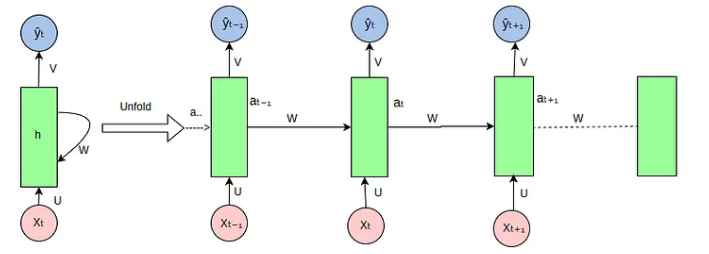## **RNN Architecture**
An RNN consists of following components:
1. Input Layer
2. Hidden Layer
3. Output Layer

The main structure is similar to a feed-forward neural network, but the key difference is the way the information flows between these layers.

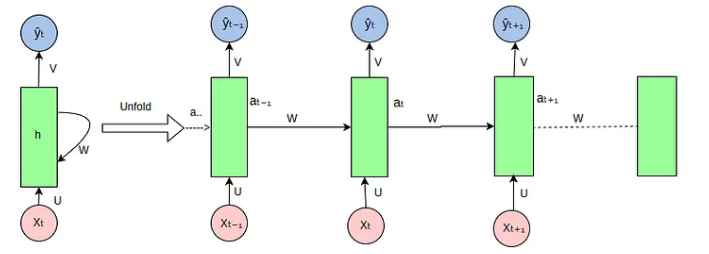



## **RNN Cell**
Each RNN Cell takes two inputs:
1. **The current input $\ X_t$**
2. **The previous hidden state $\ a_{t-1}$**

The output of each RNN Cell is:
1. **The current hidden state $\ a_{t}$**
2. **The output $\ y_t$**

## **Hidden State**
The equation for the hidden state update can be written as:

$a_t = f(W_{tt} a_{t-1} + W_{xt} x_t + b_t)$

where,

$a_t$: Hidden state at time step t.

$a_{t-1}$: Hidden state from the previous time step.

$x_t$: Input at time step t.

$W_{tt}$: Weight matrix for the hidden state.

$W_{xh}$: Weight matrix for the input.

$b_h$: Bias term

$f$: Activation function (commonly tanh or ReLU)

## **Output**
The equation for the hidden state update can be written as:

$
            V_t = g(W_{hV} + b_V)
$

$V_t$: Output at time step t.

$W_{hV}$: Weight matrix for the output.

$b_y$: Bias term. 

$g$: Activation function (commonly softmax for classification tasks)

# **CODE IMPLEMENTATION**
For the demonstration of RNN we will be using a MasterCard stock dataset from May-25-2006 to Oct-11-2021 and train RNN mdel to forecast the stock price.

We will analyze our data,preprocess it to make it preapred for model training and evaluate the results on the trained model.




## **Import the Libraries**
First let's import all the necessary libraries needed for our code implementation.
We will be using `numpy` for data manipulation, `matplotlib.pyplot` for data visualization, `scikit-learn` for scaling and evaluation, and `tensorflow` for modeling.

In [22]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import SGD
#from tensorflow.random import set_seed
from tensorflow.keras.layers import SimpleRNN, Dense

np.random.seed(455)


## **DataFrame**
Now we will import the MasterCard dataset by adding the Date column to the index and converting it to DateTime format.

We are also dropping the Dividends and Stock Splits as we are only interested in stock prices, volume and date.

We are taking the Date column as index.

Here is the dataset.

In [10]:
df = pd.read_csv('/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv', index_col = "Date", parse_dates = ["Date"])
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [11]:
df.drop(columns = ['Dividends', 'Stock Splits'], inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000


In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


For now we will be only focussing on the High column as w are going to use it to train the model.

The high column maks more sense as it will give us more specific information of how high a share has gone on a particular day.

Before moving any further first let's check if we have some 

Here we are using the data before 2020 for our training and we will try to predict the data after 2020 using our trainde model.

Here is a plot of the stoch prices oveer the time from 2016 to 2022.

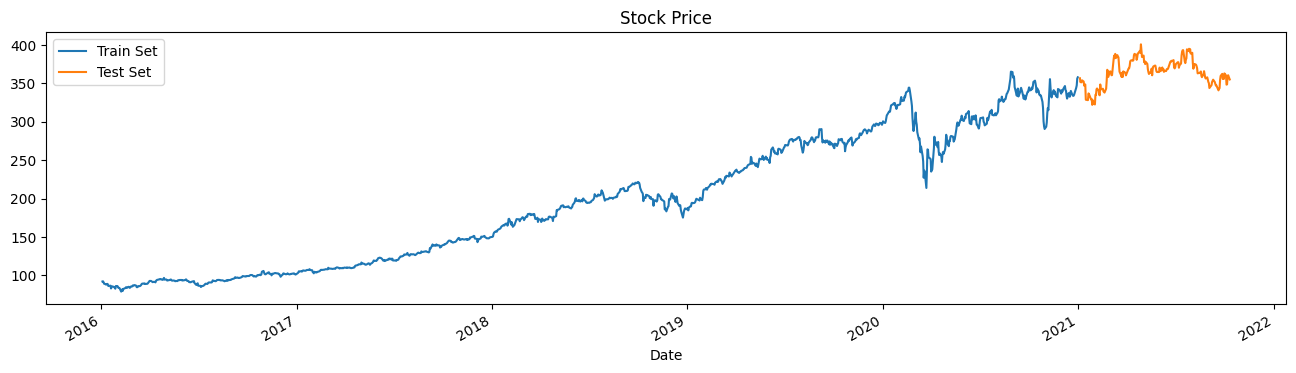

In [15]:
df.loc['2016': '2020', 'High'].plot(figsize = (16, 4))
df.loc['2021':, 'High'].plot(figsize = (16, 4))
plt.legend(['Train Set', 'Test Set'])
plt.title('Stock Price')
plt.show()

## **Data Preprocessing**
Now we will split our dataset into train and test sets. As we have already discussed we will use the data efore 2020 for our training while rest of the data will be used for testing. Here is the code for trqain test split.

In [20]:
train = df.loc['2016' : '2020', 'High'].values
test = df.loc['2021' :, 'High'].values

In [21]:
train.shape, test.shape

((1259,), (195,))

Now we will standardize our training set, We will be using Standard Scaler.

In [23]:
scaler = StandardScaler()
train_set = train.reshape(-1, 1)
train_set = scaler.fit_transform(train_set)

In [25]:
train_set.shape

(1259, 1)

Now we need to define our feature and target variables.
As we have a time series data where the goal is to predict the next value(s) in a sequence based on a specified number of previous steps.

Here is how our code works,
- Breaks a sequence into subsequences of specified length n_steps

- Builds input-output pairs with each input is a subsequence and the corresponding output is the immediate value following in the sequence.

- Creates two arrays X_tain and y_train, where the first column values of both these arrays are row sequences from which second columns gradually moved by one step forward_repr_json

-Trains models to predict a next value in the sequence from n_steps previous values.

In [30]:
X_train, y_train = list(), list()
for i in range(len(train_set)):
    end_ix = i + 50
    if end_ix > len(train_set) - 1:
        break
    seq_x, seq_y = train_set[i : end_ix], train_set[end_ix]
    X_train.append(seq_x)
    y_train.append(seq_y)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [31]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0] ,X_train.shape[1], 1)

In [32]:
X_train.shape, y_train.shape

((1209, 50, 1), (1209, 1))

## **RNN Model**
Now we need to define a Sequential RNN model with SimpleRNN layer + Dense output.

RNN layer with 100 neurons and ReLU activation, input having a time step of 50 and 1 feature.

In [33]:
model = Sequential()
model.add(SimpleRNN(100, activation = 'relu', input_shape = (50, 1)))
model.add(Dense(1)) 
model.compile(optimizer='RMSprop', loss='mse')
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1325 - val_loss: 0.0237
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0051 - val_loss: 0.0271
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0133
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0141
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0215
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 0.0112
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029 - val_loss: 0.0205
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0030 - val_loss: 0.0124
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 0.0095
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0025 - val_loss: 0.0097


We have got a training loss of 0.0025 and validation loss is 0.0097 which tells that we have got a nicly trained model. Now let's plot the predicted outcomes and the actual outcomes to see hoe our model has perfromed.

In [37]:
df_total = df.loc[:,'High']
inputs = df_total[len(df_total) - len(test) - 50 :].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [38]:
X_test, y_test = list(), list()
for i in range(len(inputs)):
    end_ix = i + 50
    if end_ix > len(inputs) - 1:
        break
    seq_x, seq_y = inputs[i : end_ix], inputs[end_ix]
    X_test.append(seq_x)
    y_test.append(seq_y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [39]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [40]:
predicted = model.predict(X_test)
#inverse transform the values
predicted = scaler.inverse_transform(predicted)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


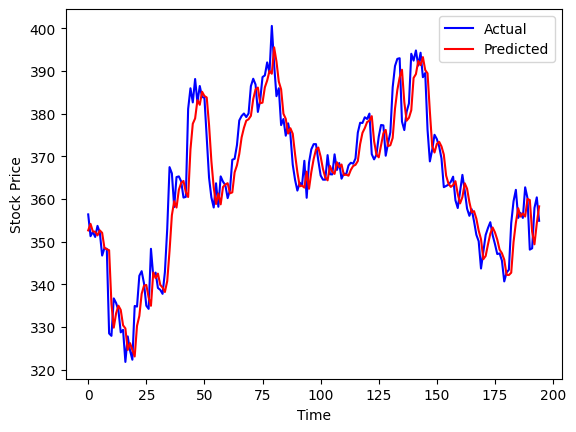

In [45]:
plt.plot(test, color = 'blue', label = 'Actual')
plt.plot(predicted, color = 'red', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


The above plot shows that we have a very well trained model for the prediction of stock proces over the years as the actual values and the predicted values have a very little margin. Also our RMSE is 5.76 which shows that our model has correctly made the predictions.

In [46]:
np.sqrt(mean_squared_error(test, predicted))

5.766323868868702

In [45]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 13.12.


The results look promising as the model got 6.70 rmse on the test dataset.

In summary, this notebook was a detailed introduction to Recurrent Neural Networks (RNNs) and how they are great at building and working on sequences data as it has the power of processing one element at an instance which can be made possible because RNN is capable of retaining memory. In addition, we explained the process how to build a simple RNN model using Keras library and showed that it actually can predict on what values are following from this time series. At this point, you should know precisely how to preprocess time series data and implement an RNN architecture (as well as train said model) on the preprocessed dataset so that your models are able to make predictions. 